In [33]:
import numpy as np
import matplotlib.pyplot as plt

# for null spaces
import scipy.linalg

# a pretty-looking matrix from scipy
from scipy.linalg import toeplitz


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # print figures in svg format
plt.rcParams.update({'font.size':14}) # set global font size

# Visualizing matrices as images

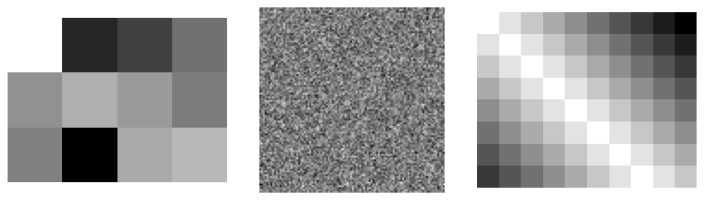

In [34]:
A = np.random.randn(3, 4)
B = np.random.randn(100, 100)
C = -toeplitz(np.arange(8), np.arange(10))

fig, axs = plt.subplots(1, 3, figsize=(10,3))
axs[0].imshow(A, cmap="gray")
axs[1].imshow(B, cmap="gray")
axs[2].imshow(C, cmap = "gray")

for i in range(3):
    axs[i].axis("off")
plt.tight_layout()
# plt.savefig('Figure_05_01.png',dpi=300)
plt.show()

# Slicing out rows and columns

In [35]:
A = np.reshape(np.arange(1,10), (3,3))
print(f"{A = }")

A = array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])


In [36]:
# get the n-th row
print(f"{A[1,:] = }")

# note that to extract only one row, you don't need the column indices. 
print(f"{A[1] = }")
# But that's potentially confusing, so I recommend avoiding that notation.

# get the n-th column, Note that it prints out as a "row" even thought it's a column of the matrix
print(f"{A[:,1] = }")

# multiple rows
print(f"{A[0:2,1] = }")

# multiple columns
print(f"\nA[:,1:]:\n{A[:,1:]}")

A[1,:] = array([4, 5, 6])
A[1] = array([4, 5, 6])
A[:,1] = array([2, 5, 8])
A[0:2,1] = array([2, 5])

A[:,1:]:
[[2 3]
 [5 6]
 [8 9]]


# Some special matrices

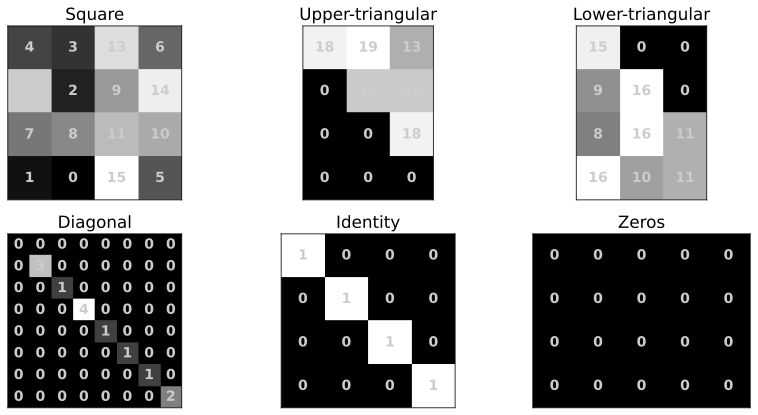

In [37]:
# square 
M1 = np.random.permutation(16).reshape(4,4)

# upper tri
M2 = np.triu(np.random.randint(10,20,(4,3)))

# lower tri
M3 = np.tril(np.random.randint(8,20,(4,3)))

# diagonal
M4 = np.diag(np.random.randint(0,6,size=8))

# identity
M5 = np.eye(4, dtype=int)

# zeros
M6 = np.zeros((4,5), dtype=int)

matrices = [M1, M2, M3, M4, M5, M6]
Mlabels = ['Square','Upper-triangular','Lower-triangular','Diagonal','Identity','Zeros']

fig, axs = plt.subplots(2,3, figsize=(12,6))
axs = axs.flatten()

for idx, m in enumerate(matrices):
    axs[idx].imshow(m, cmap="gray", origin="upper",
                    vmin=np.min(m), vmax=np.max(m))
    axs[idx].set(xticks=[], yticks=[])
    axs[idx].set_title(Mlabels[idx])

    for (j,i), num in np.ndenumerate(m):
        axs[idx].text(i, j, num, color=[.8,.8,.8], ha="center", va="center", fontweight="bold")

# plt.savefig('Figure_05_02.png',dpi=300)
plt.tight_layout()
plt.show()


# Geometry of matrix-vector multiplication

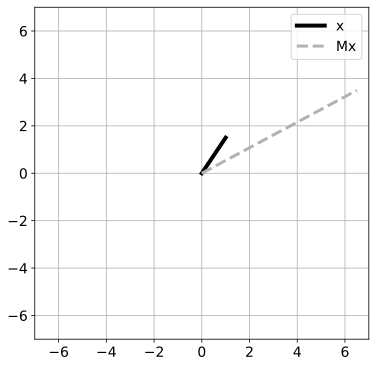

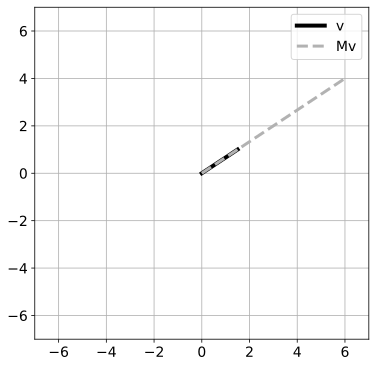

In [38]:
M = np.array([[2,3], [2,1]])
x = np.array([[1, 1.5]]).T
Mx = M@x

v = np.array([[1.5, 1]]).T
Mv = M@v

plt.figure(figsize=(6,6))
plt.plot([0, x[0, 0]], [0, x[1, 0]], "k", linewidth=4, label="x")
plt.plot([0, Mx[0, 0]], [0, Mx[1, 0]],"--", linewidth=3, color=[.7, .7, .7], label="Mx")
plt.xlim([-7, 7])
plt.ylim([-7, 7])
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(6,6))
plt.plot([0,v[0,0]],[0,v[1,0]],'k',linewidth=4,label='v')
plt.plot([0,Mv[0,0]],[0,Mv[1,0]],'--',linewidth=3,color=[.7,.7,.7],label='Mv')
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.legend()
plt.grid()
# plt.savefig('Figure_05_05b.png',dpi=300)
plt.show()

# Ex2

This and the following exercise focus on slicing matrices to obtain submatrices. Start by creating matrix in Figure 5-6, and use Python slicing to extract the submatrix comprising the first five rows and five columns. Let’s call this matrix . Try to reproduce Figure 5-6, but if you are struggling with the Python visualization coding, then just focus on extracting the submatrix correctly.

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
 
[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


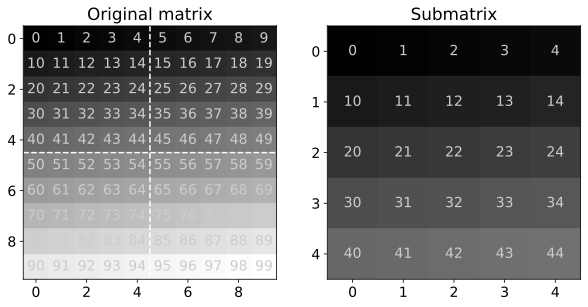

In [39]:
# Create the matrix
C = np.arange(100).reshape((10,10))

# extract submatrix
C_1 = C[0:5:1,0:5:1]

# here's what the matrices look like
print(C), print(' ')
print(C_1)

# visualize the matrices as maps
_,axs = plt.subplots(1,2,figsize=(10,5))

axs[0].imshow(C,cmap='gray',origin='upper',vmin=0,vmax=np.max(C))
axs[0].plot([4.5,4.5],[-.5,9.5],'w--')
axs[0].plot([-.5,9.5],[4.5,4.5],'w--')
axs[0].set_title('Original matrix')
# text labels
for (j,i),num in np.ndenumerate(C):
  axs[0].text(i,j,num,color=[.8,.8,.8],ha='center',va='center')


axs[1].imshow(C_1,cmap='gray',origin='upper',vmin=0,vmax=np.max(C))
axs[1].set_title('Submatrix')
# text labels
for (j,i),num in np.ndenumerate(C_1):
  axs[1].text(i,j,num,color=[.8,.8,.8],ha='center',va='center')


# plt.savefig('Figure_05_06.png',dpi=300)
plt.show()

# EX3


Expand this code to extract the other four blocks. Then create a new matrix with those blocks reorganized according to Figure 5-7.

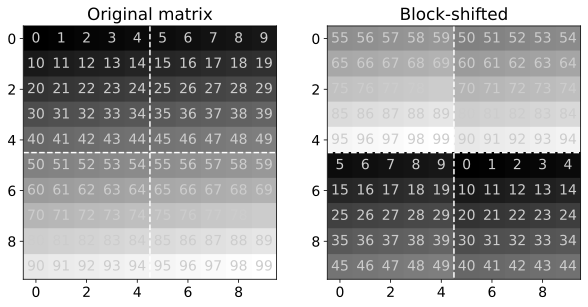

In [40]:
# cut it into blocks
C_1 = C[0:5:1,0:5:1]
C_2 = C[0:5:1,5:10:1]
C_3 = C[5:10:1,0:5:1]
C_4 = C[5:10:1,5:10:1]

# rearrange the blocks
newMatrix = np.vstack( (np.hstack((C_4,C_3)),
                        np.hstack((C_2,C_1))) )


# visualize the matrices
_,axs = plt.subplots(1,2,figsize=(10,5))

axs[0].imshow(C,cmap='gray',origin='upper',vmin=0,vmax=np.max(C))
axs[0].plot([4.5,4.5],[-.5,9.5],'w--')
axs[0].plot([-.5,9.5],[4.5,4.5],'w--')
axs[0].set_title('Original matrix')
# text labels
for (j,i),num in np.ndenumerate(C):
  axs[0].text(i,j,num,color=[.8,.8,.8],ha='center',va='center')


axs[1].imshow(newMatrix,cmap='gray',origin='upper',vmin=0,vmax=np.max(C))
axs[1].plot([4.5,4.5],[-.5,9.5],'w--')
axs[1].plot([-.5,9.5],[4.5,4.5],'w--')
axs[1].set_title('Block-shifted')
# text labels
for (j,i),num in np.ndenumerate(newMatrix):
  axs[1].text(i,j,num,color=[.8,.8,.8],ha='center',va='center')

# plt.savefig('Figure_05_07.png',dpi=300)
plt.show()
     


# Exercise 8

In this exercise, you will write a Python function that checks whether a matrix is symmetric. It should take a matrix as input, and should output a boolean True if the matrix is symmetric or False if the matrix is nonsymmetric. Keep in mind that small computer rounding/precision errors can make “equal” matrices appear unequal. Therefore, you will need to test for equality with some reasonable tolerance. Test the function on symmetric and nonsymmetric matrices.

In [41]:
def isMatrixSymmetric(S):
    # note: There are many other ways you could solve this. 
    # If you want to explore different methods, consider np.all() or np.isclose()
    diff = S - S.T
    
    # check whether sum of squared errors (SSE) is smaller than a threshold
    sse = np.sum(diff**2)

    # output TRUE if sse is tiny; FALSE means the matrix is asymmetric
    return sse<10**-15


A = np.random.randn(4,4)
AtA= A.T@A

print(f"A:\n{A}\n{isMatrixSymmetric(A)}")
print(f"\nAtA:\n{AtA}\n{isMatrixSymmetric(AtA)}")


A:
[[-4.12672182e-01  4.91128332e-01 -1.92302117e+00  1.95807801e+00]
 [-5.87590756e-01 -4.53881748e-01  8.19854488e-01  1.71088388e-03]
 [ 9.09738142e-03  1.03653035e+00  1.26387408e+00 -3.96926496e-01]
 [-4.59558245e-01  6.65905088e-01  5.38508887e-01  9.78480927e-02]]
False

AtA:
[[ 0.72683777 -0.23257074  0.07586017 -0.85762751]
 [-0.23257074  1.96504044  0.35207249  0.61462223]
 [ 0.07586017  0.35207249  6.25754132 -4.21299583]
 [-0.85762751  0.61462223 -4.21299583  4.0011973 ]]
True


# Exercise 9

I mentioned that there is an additive method for creating a symmetric matrix from a nonsymmetric square matrix. The method is quite simple: average the matrix with its transpose. Implement this algorithm in Python and confirm that the result really is symmetric. (Hint: you can use the function you wrote in the previous exercise!)

In [42]:
A = np.random.randn(4, 4)
AtA = (A + A.T)/2

print(isMatrixSymmetric(A))
print(isMatrixSymmetric(AtA))

False
True


# Exercise 10

Repeat the second part of Exercise 3-3 (the two vectors in $\mathbb{R}^3$), but use matrix-vector multiplication instead of vector-scalar multiplication. That is, compute $\mathbf{As}$ instead of $\sigma_1 \mathbf{v}_1 + \sigma_2 \mathbf{v}_2$.

In [43]:
import plotly.graph_objects as go
A = np.array([[3,0],
              [5,2],
              [1,2]])

xlim = [-4,4]
scalars = np.random.uniform(low=xlim[0],high=xlim[1],size=(100,2))

points = scalars@A.T

fig = go.Figure( data=[go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], mode='markers')])
fig.show()

In [44]:
A = np.array( [ [3,1.5],
                [5,2.5],
                [1, .5] ] )

points = scalars@A.T

fig = go.Figure( data=[go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], mode='markers')])
fig.show()

# Exercise 11

Diagonal matrices have many interesting properties that make them useful to work with. In this exercise, you will learn about two:
- Premultiplying by a diagonal matrix scales the rows of the right matrix by the corresponding diagonal elements.
- Postmultiplying by a diagonal matrix scales the columns of the left matrix by the corresponding diagonal elements.

This fact is used in several computing correlation matrices (Chapter 7) and diagonalizing a matrix (Chapters 13 and 14).

Let’s explore an implication of this property. Start by creating three $4 \times 4$ matrices: 
- a matrix of all ones (hint: np.ones()); 
- a diagonal matrix where the diagonal elements are 1, 4, 9, and 16; 
- and a diagonal matrix equal to the square root of the previous diagonal matrix.

Next, print out the pre- and postmultiplied ones matrix by the first diagonal matrix.
Finally, premultiply and postmultiply the ones matrix by the square root of the diagonal matrix. You’ll get the following:
- Notice that the rows and the columns are scaled such that the (i,j)th element in the matrix is multiplied by the product of the ith and jth diagonal elements. (In fact, we’ve created a multiplication table!)

In [45]:
A = np.ones((4, 4))
B = np.diag([1,4,9,16])
C = np.sqrt(B)

print(f"A:\n{A}\n\nB:\n{B}\n\nC:\n{C}\n")

print(f"AB:\n{A@B}\n\nBA:\n{B@A}")

print(f"\nCAC:\n{C@A@C}")

A:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

B:
[[ 1  0  0  0]
 [ 0  4  0  0]
 [ 0  0  9  0]
 [ 0  0  0 16]]

C:
[[1. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 4.]]

AB:
[[ 1.  4.  9. 16.]
 [ 1.  4.  9. 16.]
 [ 1.  4.  9. 16.]
 [ 1.  4.  9. 16.]]

BA:
[[ 1.  1.  1.  1.]
 [ 4.  4.  4.  4.]
 [ 9.  9.  9.  9.]
 [16. 16. 16. 16.]]

CAC:
[[ 1.  2.  3.  4.]
 [ 2.  4.  6.  8.]
 [ 3.  6.  9. 12.]
 [ 4.  8. 12. 16.]]


# Exercise 12

Another fun fact: matrix multiplication is the same thing as Hadamard multiplication for two diagonal matrices. Figure out why this is using paper and pencil with two diagonal matrices, and then illustrate it in Python code.

In [46]:
# Create two diagonal matrices
N = 5
D1 = np.diag( np.random.randn(N) )
D2 = np.diag( np.random.randn(N) )

# two forms of multiplication
hadamard = D1*D2
standard = D1@D2

print(f"hadamard:\n{hadamard}\n")
print(f"standard:\n{standard}")

# compare them
hadamard - standard

hadamard:
[[ 1.335184    0.          0.          0.          0.        ]
 [ 0.         -0.31019286  0.          0.          0.        ]
 [ 0.          0.          0.82866549  0.          0.        ]
 [ 0.          0.          0.         -0.75841869  0.        ]
 [ 0.          0.          0.          0.         -0.01072237]]

standard:
[[ 1.335184    0.          0.          0.          0.        ]
 [ 0.         -0.31019286  0.          0.          0.        ]
 [ 0.          0.          0.82866549  0.          0.        ]
 [ 0.          0.          0.         -0.75841869  0.        ]
 [ 0.          0.          0.          0.         -0.01072237]]


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])